In [1]:
%%time
import pandas as pd

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input//test.csv')

CPU times: user 6.9 s, sys: 719 ms, total: 7.62 s
Wall time: 7.64 s


In [2]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [3]:
y_train = train['label']
X_train = train.drop('label', 1)
X_test = test

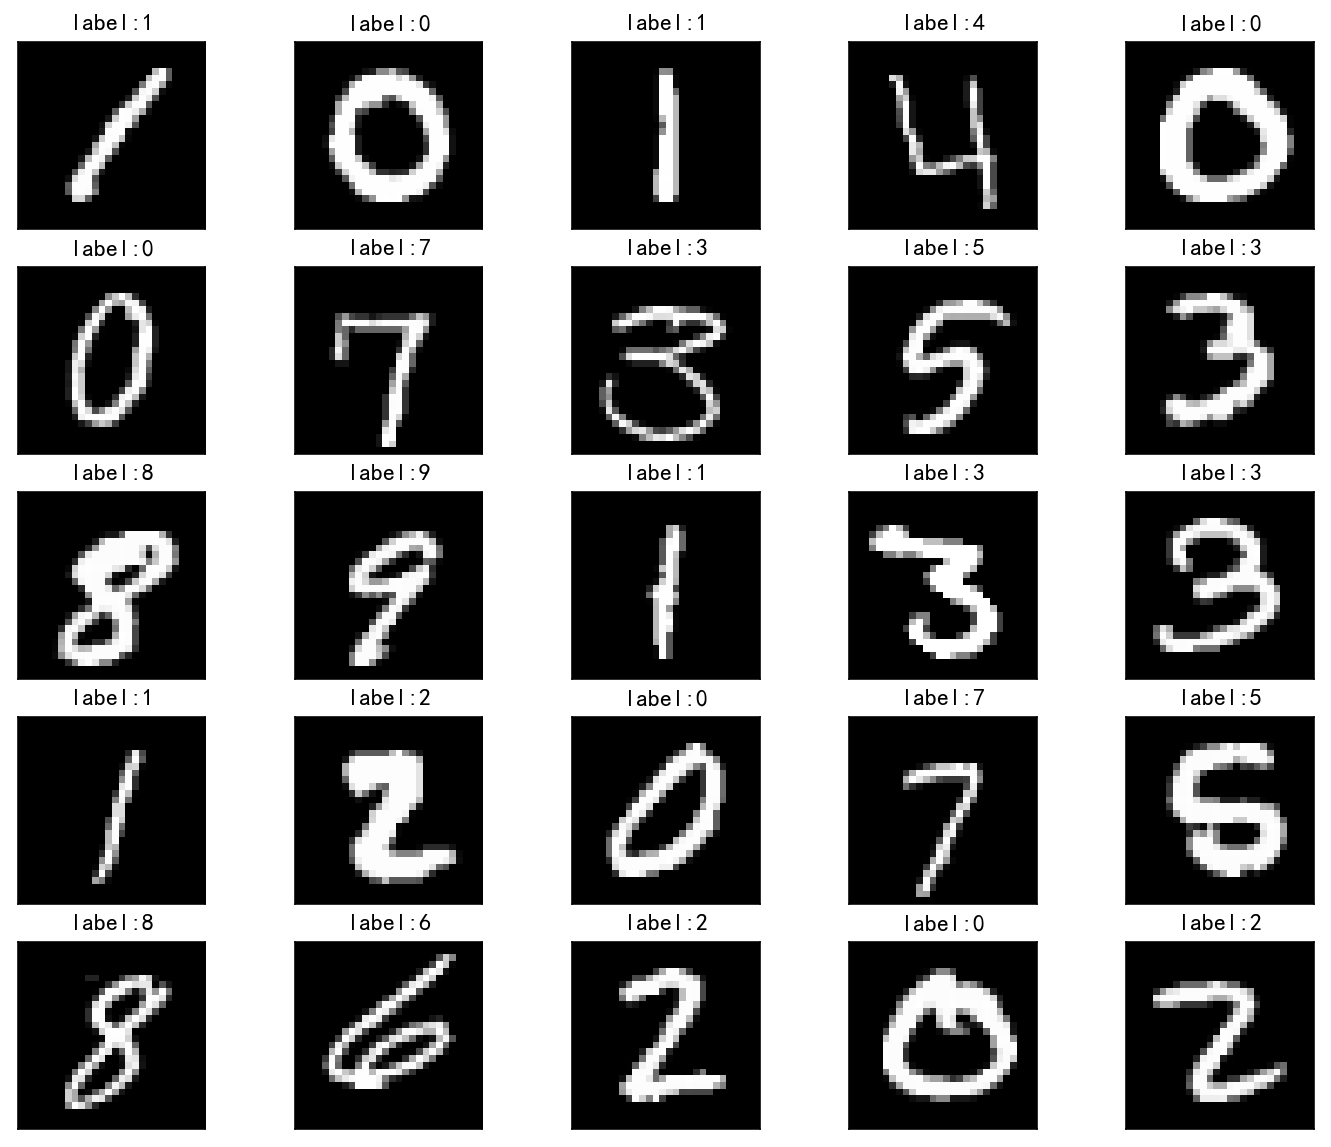

In [4]:
plt.figure(figsize=(12, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train.loc[i].values.reshape(28, 28), cmap=plt.cm.gray)
    plt.title('label:{}'.format(y_train.loc[i]))
    plt.xticks(())
    plt.yticks(())
plt.show()

In [5]:
X_train.values.min(), X_train.values.max()

(0, 255)

In [6]:
X_train /= 255.0
X_test /= 255.0

In [7]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(200, input_dim=(784)))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.optimizers import Adam

adam = Adam(lr=0.01)

In [10]:
model.compile(
    loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['acc'])

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=100,
    validation_split=0.2,
    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 2s 62us/step - loss: 0.2764 - acc: 0.9151 - val_loss: 0.1590 - val_acc: 0.9529
Epoch 2/10
33600/33600 [==============================] - 2s 49us/step - loss: 0.1426 - acc: 0.9570 - val_loss: 0.1461 - val_acc: 0.9589
Epoch 3/10
33600/33600 [==============================] - 2s 48us/step - loss: 0.1032 - acc: 0.9676 - val_loss: 0.1440 - val_acc: 0.9627
Epoch 4/10
33600/33600 [==============================] - 2s 47us/step - loss: 0.0905 - acc: 0.9716 - val_loss: 0.1299 - val_acc: 0.9662
Epoch 5/10
33600/33600 [==============================] - 2s 54us/step - loss: 0.0797 - acc: 0.9773 - val_loss: 0.1452 - val_acc: 0.9631
Epoch 6/10
33600/33600 [==============================] - 2s 55us/step - loss: 0.0789 - acc: 0.9761 - val_loss: 0.1568 - val_acc: 0.9627
Epoch 7/10
33600/33600 [==============================] - 2s 55us/step - loss: 0.

In [12]:
linear_y_predict = model.predict_classes(X_test, verbose=1)

28000/28000 [==============================] - 1s 19us/step


In [13]:
linear_submission = pd.DataFrame({
    'ImageId': range(1, 28001),
    'Label': linear_y_predict
})
linear_submission.to_csv('../output/linear_submission.csv', index=False)
# 0.959